### **Importing required Libraries**

In [11]:
#!pip install openpyxl

In [12]:
#Importing all needed libraries
import pandas as pd
import numpy as np #Matric math
import tensorflow as tf #ML
from tensorflow.python.framework import ops
from random import randint
from numpy import array
from numpy import argmax
import keras.backend as K
from tensorflow.keras import models
from numpy import array_equal
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Input
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import sys
import os
from scipy.io import loadmat
from scipy.io import loadmat

# sys.path.append(os.path.abspath("/Users/henda/anaconda3/Lib/site-packages"))
# from rnn_utils import *
# from public_tests import *
ops.reset_default_graph()

tf.compat.v1.reset_default_graph() #Clearning cache
sess=tf.compat.v1.InteractiveSession()




ERROR:tensorflow:An interactive session is already active. This can cause out-of-memory errors or some other unexpected errors (due to the unpredictable timing of garbage collection) in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s). Please use `tf.Session()` if you intend to productionize.


### **Reading data file**

In [13]:
# #Reading the training data Subject
# from google.colab import drive
# drive.mount('/content/drive')

In [14]:


# Specify the subject i want to exclude
exclude_subject = 1

# Initialize a list to hold the data for all included subjects
all_data = []

# Loop through rest of 39 subjects
for subject_id in range(1, 41):
    if subject_id == exclude_subject:
        continue  # Skip the subject to be excluded

    # Construct the file path for each subject
    data_path = f'/content/drive/My Drive/Colab Notebooks/dataset/S{subject_id}_E1.mat'

    # Load the subject's data
    training_data = loadmat(data_path)

    # Extract the data from the file
    Data = training_data["Data"]
    Data1 = np.array(Data)

    # Append the data to the all_data list
    all_data.append(Data1)



# Concatenate the data along the first axis (typically the rows, i.e., time/samples)
final_data = np.concatenate(all_data, axis=0)

# Print the shape of the final concatenated data
print(final_data.shape)






(349088, 82)


### **Defining model**

In [15]:
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, RepeatVector

# Assuming your settings
numResponses = 2
numHiddenUnits = 200
timesteps = 15  # You need to define the number of timesteps for the second LSTM

model = Sequential([
    LSTM(numHiddenUnits, return_sequences=False, input_shape=(None, 24)),  # first LSTM layer
    Dense(50, activation='relu'),  # Dense layer
    Dropout(0.5),  # Dropout layer
    RepeatVector(timesteps),  # Repeat the dense output to make it suitable for LSTM input
    LSTM(numHiddenUnits, return_sequences=False),  # Second LSTM layer
    Dense(numResponses),  # Final Dense layer for output
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### **Reading trainig dataset**

In [16]:
X=final_data[0:len(final_data),36:38]
Z=final_data[0:len(final_data),58:82]

print(X.shape)
print(Z.shape)
input_train=Z
output_train=X

del X
del Z


(349088, 2)
(349088, 24)


### **Reading testing dataset**

In [17]:
data_path = f'/content/drive/My Drive/Colab Notebooks/dataset/S{exclude_subject}_E1.mat'

# Load the subject's data
test_data = loadmat(data_path)

# Extract the data from the file
Data = training_data["Data"]
Data1 = np.array(Data)

X=Data1[0:len(Data1),36:38]
Z=Data1[0:len(Data1),58:82]

print(X.shape)
print(Z.shape)
input_test=Z
output_test=X

del X
del Z



(8861, 2)
(8861, 24)


### **Reshaping the datasets**

In [18]:
sequence_length = 15
n_features = 24  # Number of features in your data

  # Initialize a new array to store the sequences (input_train)
n_sequences = len(input_train) - sequence_length + 1
in_train = np.zeros((n_sequences, sequence_length, n_features))

# Fill the sequences array
for i in range(n_sequences):
  in_train[i] = input_train[i:i+sequence_length]
del n_sequences



  # Initialize a new array to store the sequences (input_test)
n_sequences = len(input_test) - sequence_length + 1
in_test = np.zeros((n_sequences, sequence_length, n_features))

  # Fill the sequences array
for i in range(n_sequences):
  in_test[i] = input_test[i:i+sequence_length]

del n_sequences

print(in_train.shape)
print(output_train.shape)
print(in_test.shape)

(349074, 15, 24)
(349088, 2)
(8847, 15, 24)


### **Model Training**

In [19]:

from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import sklearn
import math
import random


#########Model Training ##########
#Early stopping to the model to avoid overfitting

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

  #Compile the model
model.compile(optimizer='Adam',
            loss='mean_squared_error')
  #train the model
history=model.fit(in_train,output_train,validation_split=0.2,
                 batch_size=16,
                 epochs=200,
                 verbose=1,
                callbacks=[early_stopping]

                 )

  # Print the model summary
model.summary()







Epoch 1/200
17454/17454 ━━━━━━━━━━━━━━━━━━━━ 551s 31ms/step - loss: 0.0270 - val_loss: 0.0302
Epoch 2/200
17454/17454 ━━━━━━━━━━━━━━━━━━━━ 517s 30ms/step - loss: 0.0163 - val_loss: 0.0323
Epoch 3/200
17454/17454 ━━━━━━━━━━━━━━━━━━━━ 523s 30ms/step - loss: 0.0124 - val_loss: 0.0327
Epoch 4/200
17454/17454 ━━━━━━━━━━━━━━━━━━━━ 516s 30ms/step - loss: 0.0102 - val_loss: 0.0338


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 200)                 │         180,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │          10,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_1 (RepeatVector)       │ (None, 15, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 200)                 │         200,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             402 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,173,758 (4.48 MB)

 Trainable params: 391,252 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 782,506 (2.99 MB)

### **Model Testing**

In [20]:
######Model Testing####
#Model evaluation on testing dataset
#score=model.evaluate(in_test, output_test)
output_predicted=model.predict(in_test)

print(output_predicted.shape)
print(output_test.shape)

###Make sure length of predicted data is the same
# del n_sequences
n=len(output_test)-len(output_predicted)
if n==0:
    out_test=output_test
else:
    out_test=output_test[:-n,:]

print(output_predicted.shape)
print(out_test.shape)
# for i in range(len(output_predicted)):
#   print("actual=%s, Predicted=%s"%(out_test[i],output_predicted[i]))

  # Getting cc and rmse
pearson=np.corrcoef(out_test[:,0],output_predicted[:,0])
print("CC (θ1): %s" % pearson[1,0])

pearson=np.corrcoef(out_test[:,1],output_predicted[:,1])
print("CC (θ2): %s" % pearson[1,0])

mse= math.sqrt(sklearn.metrics.mean_squared_error(out_test[:,0],output_predicted[:,0]))
print("RMSE : %s" % mse)

277/277 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
(8847, 2)
(8861, 2)
(8847, 2)
(8847, 2)
CC (θ1): 0.37450119580526114
CC (θ2): 0.05609883504026493
RMSE : 0.15785961236526086


In [21]:
# #Save data in excel file

# import openpyxl

# # Load the existing workbook
# from google.colab import drive
# workbook_path = '/content/drive/My Drive/Colab Notebooks/dataset/Ninaprosingledimension.xlsx'

# wb = openpyxl.load_workbook(workbook_path)


# # Select the active sheet
# sheet = wb.active

# row_name = 'S40'  # Change this to the appropriate row name for each run

# # Find the row with the specified row name
# for row in sheet.iter_rows(min_row=1, max_row=sheet.max_row):
#     if row[0].value == row_name:
#         target_row = row[0].row
#         break

# # Write the data to the found row, starting from the second column
# for col, value in enumerate(cc, start=2):  # start=2 to skip the first column for the label
#     sheet.cell(row=target_row, column=col, value=value)

# # Save the workbook
# wb.save(workbook_path)


### **plot predicted vs actual**

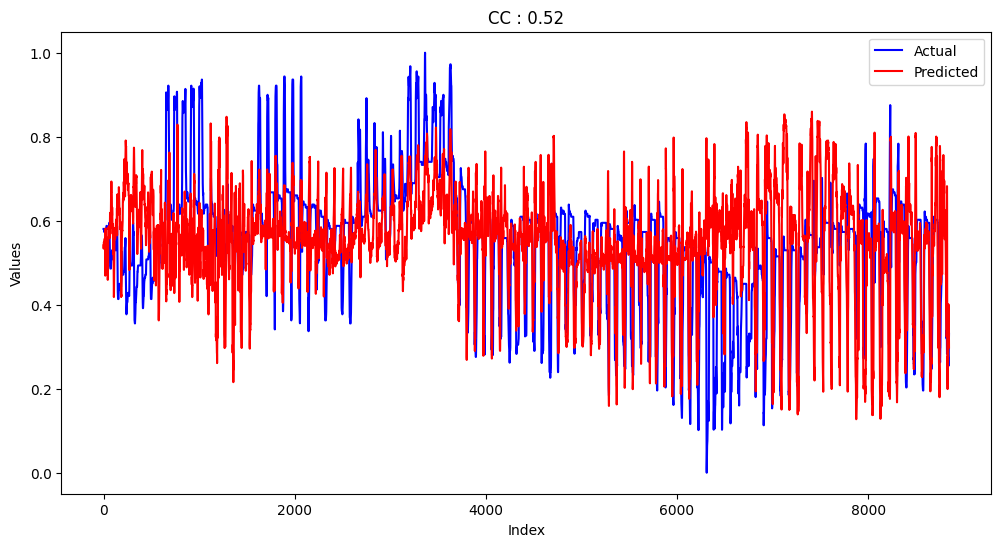

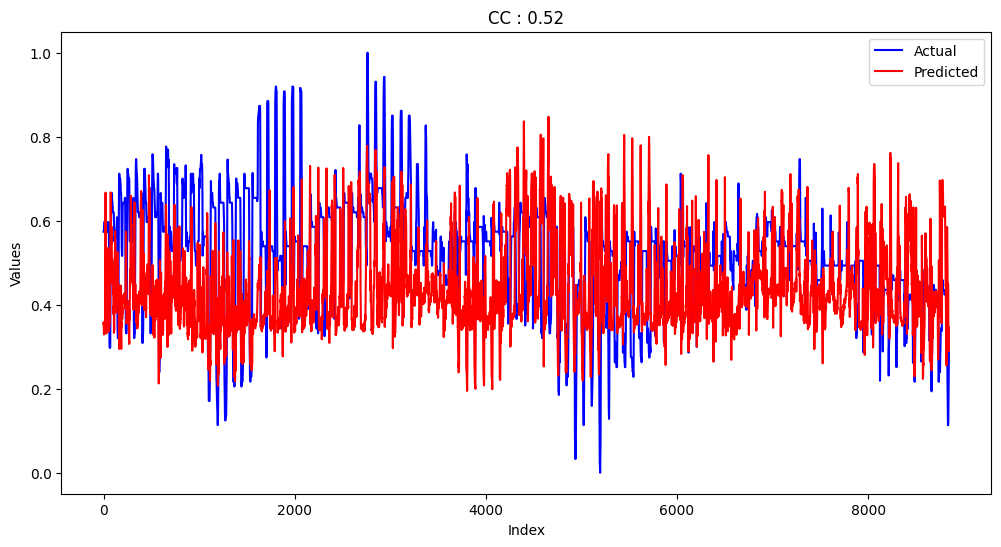

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

for i in range (0,2):
  n_rows = out_test.shape[0]
  x = np.arange(n_rows)

  y1 = out_test[:, i]  # Column
  y2 = output_predicted[:, i]

  plt.figure(figsize=(12, 6))

  # Plotting each column
  plt.plot(x, y1, label='Actual', color='blue')  # Line for column 1
  plt.plot(x, y2, label='Predicted', color='red')  # Line for column 2
  # Calculate the mean and current correlation coefficient separately
  cc_mean = pearson
  # Combine them into the plot title
  # plot_title = "CC : {:.2f}".format(cc_mean)

  plt.title(plot_title)
  plt.xlabel('Index')
  plt.ylabel('Values')
  plt.legend()

  plt.show()
